<a href="https://colab.research.google.com/github/princekingsleysunday/API/blob/master/TimeSeries(Hamoye).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from google.colab import files
uploaded = files.upload()


Saving Time_series_analysis_and_forecast_DATASET.csv to Time_series_analysis_and_forecast_DATASET (1).csv


In [68]:
data = pd.read_csv('Time_series_analysis_and_forecast_DATASET.csv')

data

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
1,2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2,2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
3,2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
4,2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...,...
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [70]:
data[ "FullDate" ] = pd.to_datetime(data[ "FullDate" ]) #convert column to datetime
# data.set_index( "FullDate" , inplace= True )


In [71]:
data.head(20)


,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030
5,2010-09-01 05:00:00,15.8,1232.000,3.69,19.160
6,2010-09-01 06:00:00,15.8,1282.930,3.69,23.540
7,2010-09-01 07:00:00,15.8,1430.935,3.69,26.235
8,2010-09-01 08:00:00,15.8,1670.275,3.69,28.690
9,2010-09-01 09:00:00,15.8,1815.155,3.69,29.630


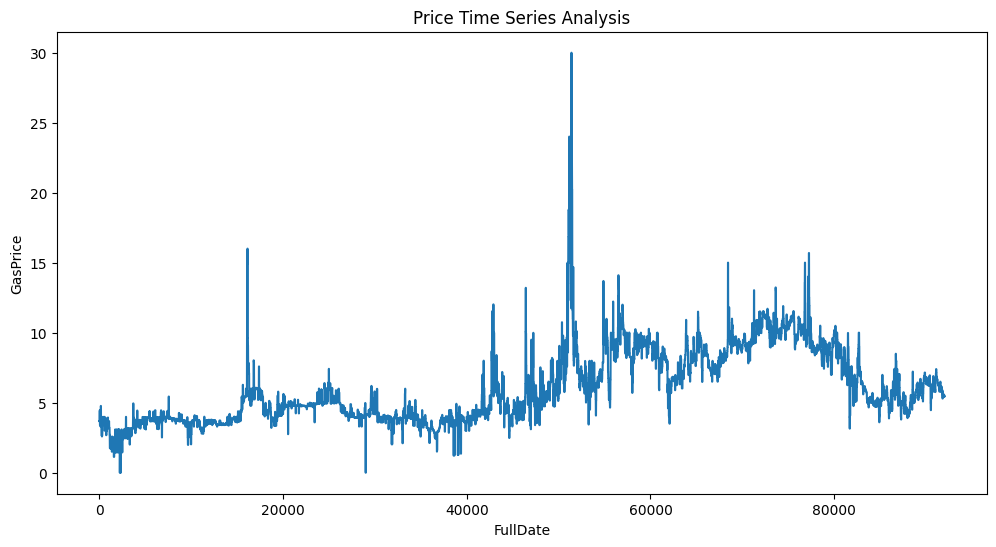

In [72]:
# Step 2: Time Series Plot
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['GasPrice'])
plt.xlabel('FullDate')
plt.ylabel('GasPrice')
plt.title('Price Time Series Analysis')
plt.show()

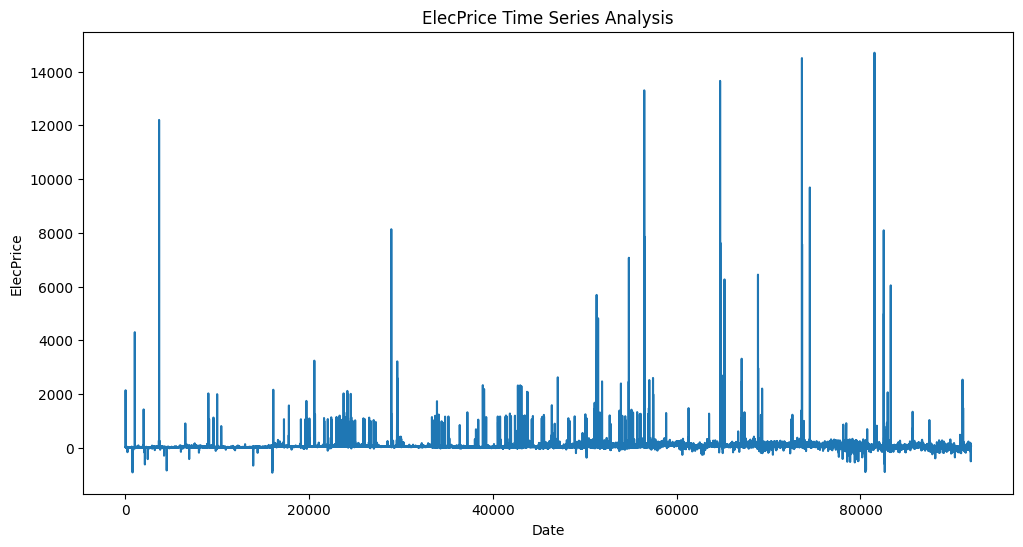

In [73]:
# Step 2: Time Series Plot
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['ElecPrice'])
plt.xlabel('Date')
plt.ylabel('ElecPrice')
plt.title('ElecPrice Time Series Analysis')
plt.show()

# Facebook Prophet

In [74]:
from prophet import Prophet

# splitting data to test and train
train_data = data[:2757]
test_data = data[2757:]


In [75]:
# # Train the Facebook Prophet model
# train_data = train_data.rename(columns={'FullDate': 'ds', 'ElecPrice': 'y'}, inplace=True)
# test_data = test_data.rename(columns={'FullDate': 'ds', 'ElecPrice': 'y'}, inplace=True)



# train_data = train_data['FullDate'] = data['Embarked'].replace({
#     'Q' : 1,
#     'S' : 2,
#     'C' : 3
#     })


# Assuming you have a DataFrame named 'train_data'
# Original DataFrame
print(train_data)

# Rename the columns using the rename method
train_data.rename(columns={'FullDate': 'ds', 'ElecPrice': 'y'}, inplace=True)

# Updated DataFrame with renamed columns
print(train_data)




                FullDate  Tmax     SysLoad  GasPrice  ElecPrice
0    2010-09-01 00:00:00  15.8  1688.21500    3.6900     23.710
1    2010-09-01 01:00:00  15.8  1669.19500    3.6900     22.635
2    2010-09-01 02:00:00  15.8  1491.98000    3.6900     22.565
3    2010-09-01 03:00:00  15.8  1330.76000    3.6900     18.910
4    2010-09-01 04:00:00  15.8  1247.94000    3.6900     18.030
...                  ...   ...         ...       ...        ...
2752 2010-12-24 16:00:00  33.3  1799.49565    3.0988     36.770
2753 2010-12-24 17:00:00  33.3  1869.43815    3.0988     35.060
2754 2010-12-24 18:00:00  33.3  1836.26230    3.0988     27.980
2755 2010-12-24 19:00:00  33.3  1716.70845    3.0988     28.115
2756 2010-12-24 20:00:00  33.3  1562.13960    3.0988     27.690

[2757 rows x 5 columns]
                      ds  Tmax     SysLoad  GasPrice       y
0    2010-09-01 00:00:00  15.8  1688.21500    3.6900  23.710
1    2010-09-01 01:00:00  15.8  1669.19500    3.6900  22.635
2    2010-09-01 02:00:00

<ipython-input-75-06483578fa10>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.rename(columns={'FullDate': 'ds', 'ElecPrice': 'y'}, inplace=True)


In [76]:
test_data

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
2757,2010-12-24 21:00:00,33.3,1513.57905,3.0988,24.870
2758,2010-12-24 22:00:00,33.3,1341.05455,3.0988,22.820
2759,2010-12-24 23:00:00,33.3,1135.43285,3.0988,21.185
2760,2010-12-25 00:00:00,31.7,1169.16690,3.0988,20.120
2761,2010-12-25 01:00:00,31.7,1209.20920,3.0988,18.065
...,...,...,...,...,...
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000


In [77]:
# Instantiate the model
model = Prophet()

train_data.rename(columns={'ElecPrice': 'y'}, inplace=True)



<ipython-input-77-7ba1c7d9255d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.rename(columns={'ElecPrice': 'y'}, inplace=True)


In [78]:
train_data.rename(columns={'FullDate': 'ds'}, inplace=True)


train_data


<ipython-input-78-e2dc7adbf44e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.rename(columns={'FullDate': 'ds'}, inplace=True)


,ds,Tmax,SysLoad,GasPrice,y
0,2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
1,2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2,2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
3,2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
4,2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...,...
2752,2010-12-24 16:00:00,33.3,1799.49565,3.0988,36.770
2753,2010-12-24 17:00:00,33.3,1869.43815,3.0988,35.060
2754,2010-12-24 18:00:00,33.3,1836.26230,3.0988,27.980
2755,2010-12-24 19:00:00,33.3,1716.70845,3.0988,28.115


In [79]:
# Fit the model with the train data
model.fit(train_data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjq97zcop/09y9uku1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjq97zcop/83rkuint.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92349', 'data', 'file=/tmp/tmpjq97zcop/09y9uku1.json', 'init=/tmp/tmpjq97zcop/83rkuint.json', 'output', 'file=/tmp/tmpjq97zcop/prophet_modelefnm6azx/prophet_model-20230731220512.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:05:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [80]:
# Make predictions on the test set
future = model.make_future_dataframe(periods=len(test_data))
forecast = model.predict(future)

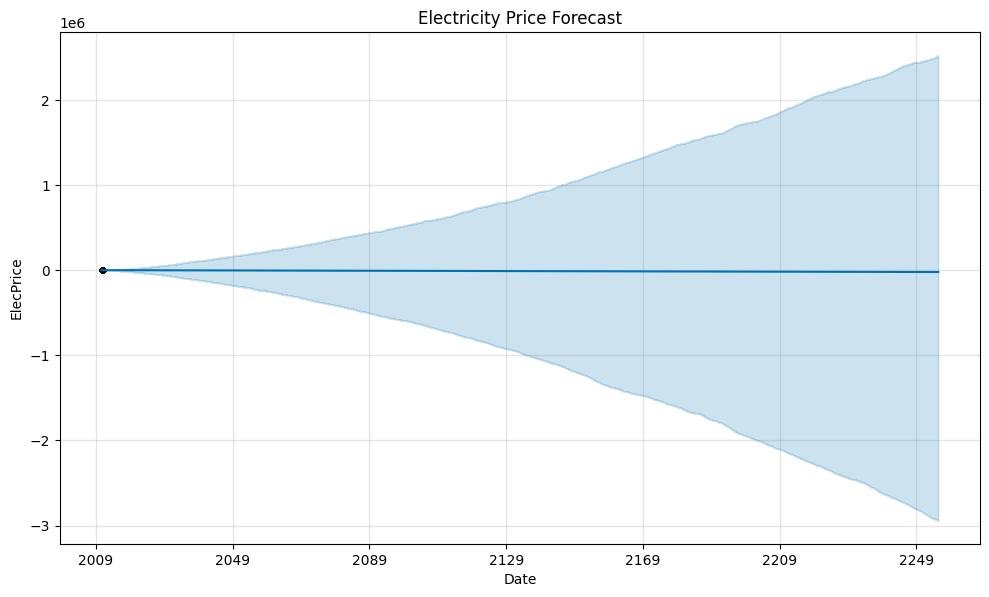

In [81]:
# Plot the results
model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('ElecPrice')
plt.title('Electricity Price Forecast')
plt.show()

# Multivariate

In [110]:

train_data.rename(columns={'ElecPrice': 'y'}, inplace=True)

train_data.rename(columns={'FullDate': 'ds'}, inplace=True)


<ipython-input-110-78f4034c69c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.rename(columns={'ElecPrice': 'y'}, inplace=True)
<ipython-input-110-78f4034c69c3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.rename(columns={'FullDate': 'ds'}, inplace=True)


In [112]:
# Divide the data into the train and test sets
train_data = data[2757:]
test_data = data[:2757]


# Add additional regressors to the train and test data
train_data['add1'] = data['SysLoad'][:2757]
train_data['add2'] = data['Tmax'][:2757]
train_data['add3'] = data['GasPrice'][:2757]


test_data['add1'] = data['SysLoad'][:2757]
test_data['add2'] = data['Tmax'][:2757]
test_data['add3'] = data['GasPrice'][:2757]


<ipython-input-112-62bd38143740>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['add1'] = data['SysLoad'][:2757]
<ipython-input-112-62bd38143740>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['add2'] = data['Tmax'][:2757]
<ipython-input-112-62bd38143740>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [116]:
train_data.rename(columns={'ElecPrice': 'y'}, inplace=True)

train_data.rename(columns={'FullDate': 'ds'}, inplace=True)



# Instantiate the model with additional regressors
model = Prophet()
# model.add_regressor('add1')
# model.add_regressor('add2')
# model.add_regressor('add3')

# Fit the model with the train data
model.fit(train_data)

# Make predictions on the test set
future = model.make_future_dataframe(periods=len(test_data))
future['add1'] = test_data['add1']
future['add2'] = test_data['add2']
future['add3'] = test_data['add3']

forecast = model.predict(future)


<ipython-input-116-eb3b432d4054>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.rename(columns={'ElecPrice': 'y'}, inplace=True)
<ipython-input-116-eb3b432d4054>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.rename(columns={'FullDate': 'ds'}, inplace=True)
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjq97zcop/d5352qwa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjq97zcop/bu7_vm3m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49076', 'data', 

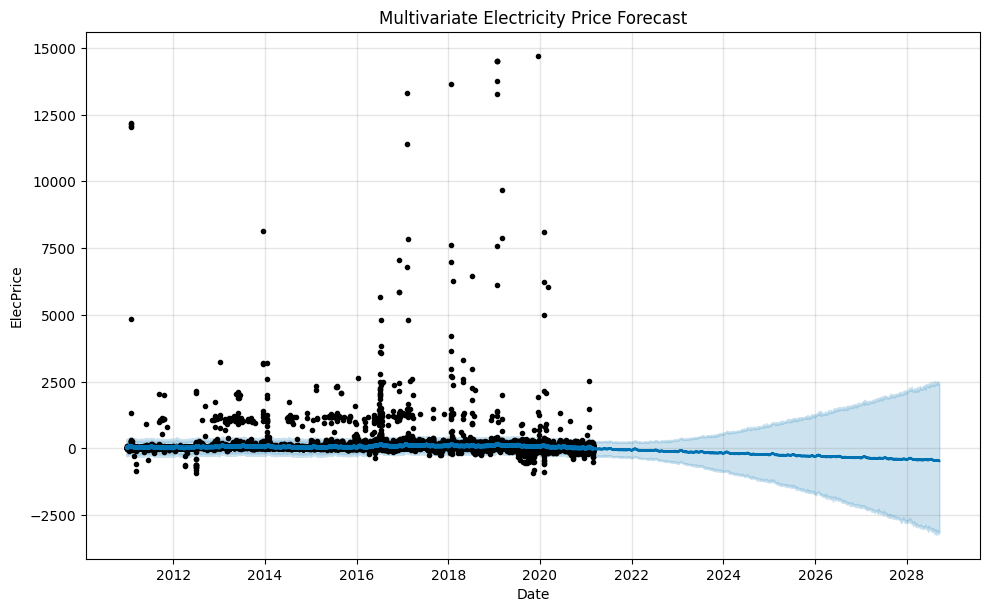

In [117]:
# Plot the results
model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('ElecPrice')
plt.title('Multivariate Electricity Price Forecast')
plt.show()


In [119]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller

# Assuming you have already resampled the 'SysLoad' and 'GasPrice' columns of the data and stored them in resampled_data DataFrame

# Perform the ADF test for 'SysLoad' column
result_sysload = adfuller(test_data['SysLoad'])
p_value_sysload = result_sysload[1]

# Perform the ADF test for 'GasPrice' column
result_gasprice = adfuller(test_data['GasPrice'])
p_value_gasprice = result_gasprice[1]

# Print the p-values to 6 decimal places
print(f"P-value for 'SysLoad': {p_value_sysload:.6f}")
print(f"P-value for 'GasPrice': {p_value_gasprice:.6f}")


P-value for 'SysLoad': 0.000053
P-value for 'GasPrice': 0.006635


In [121]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller


# Perform the ADF test for 'GasPrice' column
result_gasprice = adfuller(test_data['GasPrice'])
critical_values_gasprice = result_gasprice[4]

# Perform the ADF test for 'ElecPrice' column
result_elecprice = adfuller(test_data['ElecPrice'])
critical_values_elecprice = result_elecprice[4]

# Extract the critical values at 10% and 5% significance levels and print them to 4 decimal places
critical_10_gasprice = critical_values_gasprice['10%']
critical_5_gasprice = critical_values_gasprice['5%']

critical_10_elecprice = critical_values_elecprice['10%']
critical_5_elecprice = critical_values_elecprice['5%']

print(f"10% Critical Value for 'GasPrice': {critical_10_gasprice:.4f}")
print(f"5% Critical Value for 'GasPrice': {critical_5_gasprice:.4f}")



10% Critical Value for 'GasPrice': -2.5673
5% Critical Value for 'GasPrice': -2.8626


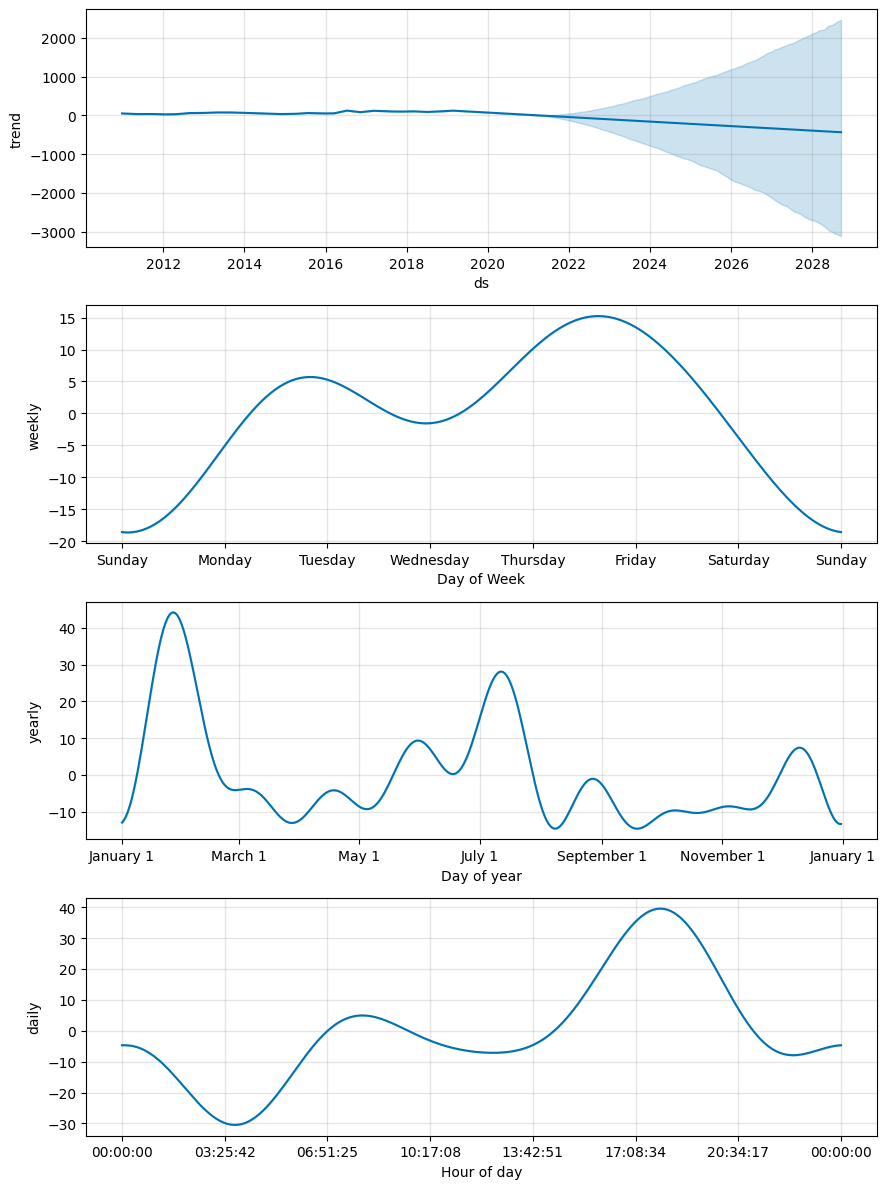

In [128]:
import matplotlib.pyplot as plt
from prophet.plot import plot_plotly, plot_components_plotly

# Assuming you have already trained the model and made the forecast as shown in your previous code

# Plot the components
fig = model.plot_components(forecast)

# Show the plot
plt.show()
